In [2]:
import cv2
import numpy as np
import os

def preprocess_image(image_path, size=(256, 256)):
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, size)
    normalized_image = resized_image / 255.0  # Normalizing to [0, 1]
    return normalized_image

def preprocess_colored_mask(mask_path, size=(256, 256)):
    mask = cv2.imread(mask_path)  # Load the mask as a color image
    resized_mask = cv2.resize(mask, size)
    return resized_mask

def load_and_preprocess_data(train_folder, labels_folder, size=(256, 256)):
    images = []
    masks = []
    level_segments = []
    polygons = []

    for batch_folder in os.listdir(train_folder):
        batch_path = os.path.join(train_folder, batch_folder)
        for file_name in os.listdir(batch_path):
            if file_name.endswith("_leftImg8bit.png"):
                image_path = os.path.join(batch_path, file_name)
                mask_path = os.path.join(labels_folder, f"{file_name.split('_leftImg8bit')[0]}_gtFine_labelColors.png")
                level_segment_path = os.path.join(labels_folder, f"{file_name.split('_leftImg8bit')[0]}_gtFine_labellevel3Ids.png")
                polygon_path = os.path.join(labels_folder, f"{file_name.split('_leftImg8bit')[0]}_gtFine_polygons.json")

                images.append(preprocess_image(image_path, size))
                masks.append(preprocess_colored_mask(mask_path, size))

                # Load level-labeled segments and polygon data
                level_segment = cv2.imread(level_segment_path, cv2.IMREAD_GRAYSCALE)
                polygons.append(polygon_path)  # Store the path for later use

                level_segments.append(level_segment)

    return np.array(images), np.array(masks), np.array(level_segments), polygons

train_folder = 'D:/New folder/Inter_Bootcamp/dataset/train'
labels_folder = 'D:/New folder/Inter_Bootcamp/dataset/labels'
images, masks, level_segments, polygons = load_and_preprocess_data(train_folder, labels_folder)

# Note: Process the polygons (JSON) during training/inference as needed.


In [3]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os
import json

class SegmentationDataset(Dataset):
    def __init__(self, image_folder, label_folder, transform=None):
        self.image_folder = image_folder
        self.label_folder = label_folder
        self.image_files = []
        
        for batch_folder in os.listdir(image_folder):
            batch_path = os.path.join(image_folder, batch_folder)
            if os.path.isdir(batch_path):
                self.image_files += [os.path.join(batch_path, f) for f in os.listdir(batch_path) if f.endswith('_leftImg8bit.jpg')]
        
        if not self.image_files:
            raise ValueError("No images found in the image folder!")
        
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = self.image_files[idx]
        img_name = os.path.basename(img_path)
        batch_name = os.path.basename(os.path.dirname(img_path))

        label_path = os.path.join(self.label_folder, batch_name, f"{img_name.split('_leftImg8bit')[0]}_gtFine_labelColors.png")
        level_path = os.path.join(self.label_folder, batch_name, f"{img_name.split('_leftImg8bit')[0]}_gtFine_labellevel3Ids.png")
        polygon_path = os.path.join(self.label_folder, batch_name, f"{img_name.split('_leftImg8bit')[0]}_gtFine_polygons.json")

        try:
            image = Image.open(img_path)
            label = Image.open(label_path)
            level_segment = Image.open(level_path)
            
            with open(polygon_path, 'r') as file:
                polygons = json.load(file)
        except FileNotFoundError as e:
            print(f"File not found: {e.filename}")
            raise
        except Exception as e:
            print(f"Error loading file: {e}")
            raise

        if self.transform:
            image = self.transform(image)
            label = self.transform(label)
            level_segment = self.transform(level_segment)
        
        return image, label, level_segment, polygons

# Custom collate function
def custom_collate(batch):
    images, labels, level_segments, polygons = zip(*batch)
    images = torch.stack(images)
    labels = torch.stack(labels)
    level_segments = torch.stack(level_segments)
    return images, labels, level_segments, polygons

# Define transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor()
])

# Create dataset
train_folder = 'D:/New folder/Inter_Bootcamp/dataset/train'
labels_folder = 'D:/New folder/Inter_Bootcamp/dataset/labels'
dataset = SegmentationDataset(train_folder, labelsins_folder, transform=transform)

# Create data loader with custom collate function
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, collate_fn=custom_collate)

# Example usage
for images, labels, level_segments, polygons in dataloader:
    print(f"Loaded batch with {images.size(0)} images.")
    break


NameError: name 'labelsins_folder' is not defined

In [4]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os
import json

class SegmentationDataset(Dataset):
    def __init__(self, image_folder, label_folder, transform=None):
        self.image_folder = image_folder
        self.label_folder = label_folder
        self.image_files = []
        
        for batch_folder in os.listdir(image_folder):
            batch_path = os.path.join(image_folder, batch_folder)
            if os.path.isdir(batch_path):
                self.image_files += [os.path.join(batch_path, f) for f in os.listdir(batch_path) if f.endswith('_leftImg8bit.jpg')]
        
        if not self.image_files:
            raise ValueError("No images found in the image folder!")
        
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = self.image_files[idx]
        img_name = os.path.basename(img_path)
        batch_name = os.path.basename(os.path.dirname(img_path))

        label_path = os.path.join(self.label_folder, batch_name, f"{img_name.split('_leftImg8bit')[0]}_gtFine_labelColors.png")
        level_path = os.path.join(self.label_folder, batch_name, f"{img_name.split('_leftImg8bit')[0]}_gtFine_labellevel3Ids.png")
        polygon_path = os.path.join(self.label_folder, batch_name, f"{img_name.split('_leftImg8bit')[0]}_gtFine_polygons.json")

        image = Image.open(img_path)
        label = Image.open(label_path)
        level_segment = Image.open(level_path)
        
        with open(polygon_path, 'r') as file:
            polygons = json.load(file)

        if self.transform:
            image = self.transform(image)
            label = self.transform(label)
            level_segment = self.transform(level_segment)
        
        # Debugging prints
        print(f"Image size: {image.size()}")
        print(f"Label size: {label.size()}")
        print(f"Level segment size: {level_segment.size()}")

        return image, label, level_segment, polygons

# Custom collate function
def custom_collate(batch):
    images, labels, level_segments, polygons = zip(*batch)
    images = torch.stack(images)
    labels = torch.stack(labels)
    level_segments = torch.stack(level_segments)
    return images, labels, level_segments, polygons

# Define transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor()
])

# Create dataset
train_folder = 'D:/New folder/Inter_Bootcamp/dataset/train'
labels_folder = 'D:/New folder/Inter_Bootcamp/dataset/labels'
dataset = SegmentationDataset(train_folder, labels_folder, transform=transform)

# Create data loader with custom collate function
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, collate_fn=custom_collate)

# Example usage
for images, labels, level_segments, polygons in dataloader:
    print(f"Loaded batch with {images.size(0)} images.")
    break


Image size: torch.Size([3, 256, 256])
Label size: torch.Size([4, 256, 256])
Level segment size: torch.Size([1, 256, 256])
Image size: torch.Size([3, 256, 256])
Label size: torch.Size([4, 256, 256])
Level segment size: torch.Size([1, 256, 256])
Image size: torch.Size([3, 256, 256])
Label size: torch.Size([4, 256, 256])
Level segment size: torch.Size([1, 256, 256])
Image size: torch.Size([3, 256, 256])
Label size: torch.Size([4, 256, 256])
Level segment size: torch.Size([1, 256, 256])
Image size: torch.Size([3, 256, 256])
Label size: torch.Size([4, 256, 256])
Level segment size: torch.Size([1, 256, 256])
Image size: torch.Size([3, 256, 256])
Label size: torch.Size([4, 256, 256])
Level segment size: torch.Size([1, 256, 256])
Image size: torch.Size([3, 256, 256])
Label size: torch.Size([4, 256, 256])
Level segment size: torch.Size([1, 256, 256])
Image size: torch.Size([3, 256, 256])
Label size: torch.Size([4, 256, 256])
Level segment size: torch.Size([1, 256, 256])
Image size: torch.Size([

In [5]:
import helper

import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os
import json
import segmentation_models_pytorch as smp
import torchmetrics.functional as tmf
from pytorch_lightning import LightningModule, Trainer
from pytorch_lightning.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

n_classes = 40  # Based on your labels

# Split the dataset
image_files = [os.path.join(dp, f) for dp, dn, filenames in os.walk("D:/New folder/Inter_Bootcamp/dataset/train") for f in filenames if f.endswith('_leftImg8bit.jpg')]
train_files, val_files = train_test_split(image_files, test_size=0.2, random_state=42)

class CustomCityscapesDataset(Dataset):
    def __init__(self, image_files, label_dir, transform=None):
        self.image_files = image_files
        self.label_dir = label_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = self.image_files[idx]
        img_name = os.path.basename(img_path).replace('_leftImg8bit.jpg', '')
        batch_name = os.path.basename(os.path.dirname(img_path))

        label_path = os.path.join(self.label_dir, batch_name, f"{img_name}_gtFine_labelColors.png")
        image = Image.open(img_path).convert("RGB")
        label = Image.open(label_path).convert("RGB")

        if self.transform:
            image = self.transform(image)
            label = self.transform(label)

        return image, label

# Function to encode segmented maps
def encode_segmap(mask):
    mask = mask.numpy() if isinstance(mask, torch.Tensor) else mask
    mask = mask.astype(np.uint8)
    label_map = np.zeros(mask.shape[:2], dtype=np.int32)
    for label in labels:
        color = np.array(label.color, dtype=np.uint8)
        equal_mask = np.all(mask == color, axis=-1)
        label_map[equal_mask] = label.level3Id
    return label_map


# Function to decode segmented maps
def decode_segmap(label_mask, dataset='cityscapes', plot=False):
    label_colours = {label.level3Id: label.color for label in labels}
    r = label_mask.copy()
    g = label_mask.copy()
    b = label_mask.copy()
    for l in np.unique(label_mask):
        r[label_mask == l] = label_colours[l][0]
        g[label_mask == l] = label_colours[l][1]
        b[label_mask == l] = label_colours[l][2]
    rgb = np.zeros((label_mask.shape[0], label_mask.shape[1], 3))
    rgb[:, :, 0] = r / 255.0
    rgb[:, :, 1] = g / 255.0
    rgb[:, :, 2] = b / 255.0
    return rgb

# Define transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# Create datasets
train_dataset = CustomCityscapesDataset(train_files, "D:/New folder/Inter_Bootcamp/dataset/labels", transform=transform)
val_dataset = CustomCityscapesDataset(val_files, "D:/New folder/Inter_Bootcamp/dataset/labels", transform=transform)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)


C:\Users\prakh\anaconda3\envs\deeplearning\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os
import json
import segmentation_models_pytorch as smp
import torchmetrics.functional as tmf
from torchmetrics import JaccardIndex 
from pytorch_lightning import LightningModule, Trainer
from pytorch_lightning.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

n_classes = 40  # Based on your labels

# Split the dataset
image_files = [os.path.join(dp, f) for dp, dn, filenames in os.walk("D:/New folder/Inter_Bootcamp/dataset/train") for f in filenames if f.endswith('_leftImg8bit.jpg')]
train_files, val_files = train_test_split(image_files, test_size=0.2, random_state=42)

class CustomCityscapesDataset(Dataset):
    def __init__(self, image_files, label_dir, transform=None):
        self.image_files = image_files
        self.label_dir = label_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = self.image_files[idx]
        img_name = os.path.basename(img_path).replace('_leftImg8bit.jpg', '')
        batch_name = os.path.basename(os.path.dirname(img_path))

        label_path = os.path.join(self.label_dir, batch_name, f"{img_name}_gtFine_labelColors.png")
        image = Image.open(img_path).convert("RGB")
        label = Image.open(label_path).convert("RGB")

        if self.transform:
            image = self.transform(image)
            label = self.transform(label)

        return image, label

# Use the helper.py labels list directly
labels_list = [
    ('road', 0, 7, 0, 0, 0, 'drivable', 0, 0, False, False, (128, 64, 128)),
    ('parking', 1, 9, 255, 1, 1, 'drivable', 1, 0, False, False, (250, 170, 160)),
    ('drivable fallback', 2, 255, 255, 2, 1, 'drivable', 1, 0, False, False, (81, 0, 81)),
    ('sidewalk', 3, 8, 1, 3, 2, 'non-drivable', 2, 1, False, False, (244, 35, 232)),
    ('rail track', 4, 10, 255, 3, 3, 'non-drivable', 3, 1, False, False, (230, 150, 140)),
    ('non-drivable fallback', 5, 255, 9, 4, 3, 'non-drivable', 3, 1, False, False, (152, 251, 152)),
    ('person', 6, 24, 11, 5, 4, 'living-thing', 4, 2, True, False, (220, 20, 60)),
    ('animal', 7, 255, 255, 6, 4, 'living-thing', 4, 2, True, True, (246, 198, 145)),
    ('rider', 8, 25, 12, 7, 5, 'living-thing', 5, 2, True, False, (255, 0, 0)),
    ('motorcycle', 9, 32, 17, 8, 6, '2-wheeler', 6, 3, True, False, (0, 0, 230)),
    ('bicycle', 10, 33, 18, 9, 7, '2-wheeler', 6, 3, True, False, (119, 11, 32)),
    ('autorickshaw', 11, 255, 255, 10, 8, 'autorickshaw', 7, 3, True, False, (255, 204, 54)),
    ('car', 12, 26, 13, 11, 9, 'car', 7, 3, True, False, (0, 0, 142)),
    ('truck', 13, 27, 14, 12, 10, 'large-vehicle', 8, 3, True, False, (0, 0, 70)),
    ('bus', 14, 28, 15, 13, 11, 'large-vehicle', 8, 3, True, False, (0, 60, 100)),
    ('caravan', 15, 29, 255, 14, 12, 'large-vehicle', 8, 3, True, True, (0, 0, 90)),
    ('trailer', 16, 30, 255, 15, 12, 'large-vehicle', 8, 3, True, True, (0, 0, 110)),
    ('train', 17, 31, 16, 15, 12, 'large-vehicle', 8, 3, True, True, (0, 80, 100)),
    ('vehicle fallback', 18, 355, 255, 15, 12, 'large-vehicle', 8, 3, True, False, (136, 143, 153)),
    ('curb', 19, 255, 255, 16, 13, 'barrier', 9, 4, False, False, (220, 190, 40)),
    ('wall', 20, 12, 3, 17, 14, 'barrier', 9, 4, False, False, (102, 102, 156)),
    ('fence', 21, 13, 4, 18, 15, 'barrier', 10, 4, False, False, (190, 153, 153)),
    ('guard rail', 22, 14, 255, 19, 16, 'barrier', 10, 4, False, False, (180, 165, 180)),
    ('billboard', 23, 255, 255, 20, 17, 'structures', 11, 4, False, False, (174, 64, 67)),
    ('traffic sign', 24, 20, 7, 21, 18, 'structures', 11, 4, False, False, (220, 220, 0)),
    ('traffic light', 25, 19, 6, 22, 19, 'structures', 11, 4, False, False, (250, 170, 30)),
    ('pole', 26, 17, 5, 23, 20, 'structures', 12, 4, False, False, (153, 153, 153)),
    ('polegroup', 27, 18, 255, 23, 20, 'structures', 12, 4, False, False, (153, 153, 153)),
    ('obs-str-bar-fallback', 28, 255, 255, 24, 21, 'structures', 12, 4, False, False, (169, 187, 214)),
    ('building', 29, 11, 2, 25, 22, 'construction', 13, 5, False, False, (70, 70, 70)),
    ('bridge', 30, 15, 255, 26, 23, 'construction', 13, 5, False, False, (150, 100, 100)),
    ('tunnel', 31, 16, 255, 26, 23, 'construction', 13, 5, False, False, (150, 120, 90)),
    ('vegetation', 32, 21, 8, 27, 24, 'vegetation', 14, 5, False, False, (107, 142, 35)),
    ('sky', 33, 23, 10, 28, 25, 'sky', 15, 6, False, False, (70, 130, 180)),
    ('fallback background', 34, 255, 255, 29, 25, 'object fallback', 15, 6, False, False, (169, 187, 214)),
    ('unlabeled', 35, 0, 255, 255, 255, 'void', 255, 255, False, True, (0, 0, 0)),
    ('ego vehicle', 36, 1, 255, 255, 255, 'void', 255, 255, False, True, (0, 0, 0)),
    ('rectification border', 37, 2, 255, 255, 255, 'void', 255, 255, False, True, (0, 0, 0)),
    ('out of roi', 38, 3, 255, 255, 255, 'void', 255, 255, False, True, (0, 0, 0)),
    ('license plate', 39, 255, 255, 255, 255, 'vehicle', 255, 255, False, True, (0, 0, 142)),
]

# Function to encode segmented maps
def encode_segmap(mask, label_list):
    mask = mask.astype(np.uint8)
    label_map = np.zeros(mask.shape[:2], dtype=np.int32)
    for label in label_list:
        r, g, b = label[11]
        color_mask = (mask[:, :, 0] == r) & (mask[:, :, 1] == g) & (mask[:, :, 2] == b)
        label_map[color_mask] = label[5]
    return label_map

class OurModel(LightningModule):
    def __init__(self):
        super(OurModel, self).__init__()
        self.model = smp.Unet(
            encoder_name="resnet34", 
            encoder_weights="imagenet", 
            in_channels=3, 
            classes=n_classes
        )
        self.lr = 1e-3
        self.criterion = smp.losses.DiceLoss(mode='multiclass')
        self.metric = JaccardIndex(task='multiclass',num_classes=n_classes)
    
    def forward(self, x):
        return self.model(x)
    
    def configure_optimizers(self):
        return torch.optim.AdamW(self.parameters(), lr=self.lr)
    
    def training_step(self, batch, batch_idx):
        img, seg = batch
        
        # Move img and seg to the device (GPU) and set the correct data types
        img = img.to(self.device).half() # Convert input images to float16 and move to GPU
        seg = seg.permute(0, 2, 3, 1).cpu().numpy()  # BCHW -> BHWC
        seg = np.array([encode_segmap(s, labels_list) for s in seg])  # Encode segmentation mask
        seg = torch.tensor(seg, dtype=torch.long).to(self.device)  # Convert to tensor and move to GPU
        
        output = self(img)
        loss = self.criterion(output, seg)
        iou = self.metric(output, seg)
        
        self.log('train_loss', loss, on_epoch=True)
        self.log('train_iou', iou, on_epoch=True)
        
        return loss

    def validation_step(self, batch, batch_idx):
        img, seg = batch
        
        # Move img and seg to the device (GPU) and set the correct data types
        img = img.to(self.device).half()  # Convert input images to float16 and move to GPU
        seg = seg.permute(0, 2, 3, 1).cpu().numpy()  # BCHW -> BHWC
        seg = np.array([encode_segmap(s, labels_list) for s in seg])  # Encode segmentation mask
        seg = torch.tensor(seg, dtype=torch.long).to(self.device)  # Convert to tensor and move to GPU
        
        output = self(img)
        loss = self.criterion(output, seg)
        iou = self.metric(output, seg)
        
        self.log('val_loss', loss, on_epoch=True)
        self.log('val_iou', iou, on_epoch=True)
        
        return loss


# Training setup remains the same
checkpoint_callback = ModelCheckpoint(monitor='val_loss', save_top_k=1)
trainer = Trainer(
    max_epochs=25, 
    accelerator='gpu', 
    precision=16, 
    callbacks=[checkpoint_callback]
)

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [9]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os
import json
import segmentation_models_pytorch as smp
import torchmetrics.functional as tmf
from torchmetrics import JaccardIndex 
from pytorch_lightning import LightningModule, Trainer
from pytorch_lightning.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

n_classes = 40  # Based on your labels

# Split the dataset
image_files = [os.path.join(dp, f) for dp, dn, filenames in os.walk("D:/New folder/Inter_Bootcamp/dataset/train") for f in filenames if f.endswith('_leftImg8bit.jpg')]
train_files, val_files = train_test_split(image_files, test_size=0.2, random_state=42)

class CustomCityscapesDataset(Dataset):
    def __init__(self, image_files, label_dir, transform=None):
        self.image_files = image_files
        self.label_dir = label_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = self.image_files[idx]
        img_name = os.path.basename(img_path).replace('_leftImg8bit.jpg', '')
        batch_name = os.path.basename(os.path.dirname(img_path))

        label_path = os.path.join(self.label_dir, batch_name, f"{img_name}_gtFine_labelColors.png")
        image = Image.open(img_path).convert("RGB")
        label = Image.open(label_path).convert("RGB")

        if self.transform:
            image = self.transform(image)
            label = self.transform(label)

        return image, label

# Use the helper.py labels list directly
labels_list = [
    ('road', 0, 7, 0, 0, 0, 'drivable', 0, 0, False, False, (128, 64, 128)),
    ('parking', 1, 9, 255, 1, 1, 'drivable', 1, 0, False, False, (250, 170, 160)),
    ('drivable fallback', 2, 255, 255, 2, 1, 'drivable', 1, 0, False, False, (81, 0, 81)),
    ('sidewalk', 3, 8, 1, 3, 2, 'non-drivable', 2, 1, False, False, (244, 35, 232)),
    ('rail track', 4, 10, 255, 3, 3, 'non-drivable', 3, 1, False, False, (230, 150, 140)),
    ('non-drivable fallback', 5, 255, 9, 4, 3, 'non-drivable', 3, 1, False, False, (152, 251, 152)),
    ('person', 6, 24, 11, 5, 4, 'living-thing', 4, 2, True, False, (220, 20, 60)),
    ('animal', 7, 255, 255, 6, 4, 'living-thing', 4, 2, True, True, (246, 198, 145)),
    ('rider', 8, 25, 12, 7, 5, 'living-thing', 5, 2, True, False, (255, 0, 0)),
    ('motorcycle', 9, 32, 17, 8, 6, '2-wheeler', 6, 3, True, False, (0, 0, 230)),
    ('bicycle', 10, 33, 18, 9, 7, '2-wheeler', 6, 3, True, False, (119, 11, 32)),
    ('autorickshaw', 11, 255, 255, 10, 8, 'autorickshaw', 7, 3, True, False, (255, 204, 54)),
    ('car', 12, 26, 13, 11, 9, 'car', 7, 3, True, False, (0, 0, 142)),
    ('truck', 13, 27, 14, 12, 10, 'large-vehicle', 8, 3, True, False, (0, 0, 70)),
    ('bus', 14, 28, 15, 13, 11, 'large-vehicle', 8, 3, True, False, (0, 60, 100)),
    ('caravan', 15, 29, 255, 14, 12, 'large-vehicle', 8, 3, True, True, (0, 0, 90)),
    ('trailer', 16, 30, 255, 15, 12, 'large-vehicle', 8, 3, True, True, (0, 0, 110)),
    ('train', 17, 31, 16, 15, 12, 'large-vehicle', 8, 3, True, True, (0, 80, 100)),
    ('vehicle fallback', 18, 355, 255, 15, 12, 'large-vehicle', 8, 3, True, False, (136, 143, 153)),
    ('curb', 19, 255, 255, 16, 13, 'barrier', 9, 4, False, False, (220, 190, 40)),
    ('wall', 20, 12, 3, 17, 14, 'barrier', 9, 4, False, False, (102, 102, 156)),
    ('fence', 21, 13, 4, 18, 15, 'barrier', 10, 4, False, False, (190, 153, 153)),
    ('guard rail', 22, 14, 255, 19, 16, 'barrier', 10, 4, False, False, (180, 165, 180)),
    ('billboard', 23, 255, 255, 20, 17, 'structures', 11, 4, False, False, (174, 64, 67)),
    ('traffic sign', 24, 20, 7, 21, 18, 'structures', 11, 4, False, False, (220, 220, 0)),
    ('traffic light', 25, 19, 6, 22, 19, 'structures', 11, 4, False, False, (250, 170, 30)),
    ('pole', 26, 17, 5, 23, 20, 'structures', 12, 4, False, False, (153, 153, 153)),
    ('polegroup', 27, 18, 255, 23, 20, 'structures', 12, 4, False, False, (153, 153, 153)),
    ('obs-str-bar-fallback', 28, 255, 255, 24, 21, 'structures', 12, 4, False, False, (169, 187, 214)),
    ('building', 29, 11, 2, 25, 22, 'construction', 13, 5, False, False, (70, 70, 70)),
    ('bridge', 30, 15, 255, 26, 23, 'construction', 13, 5, False, False, (150, 100, 100)),
    ('tunnel', 31, 16, 255, 26, 23, 'construction', 13, 5, False, False, (150, 120, 90)),
    ('vegetation', 32, 21, 8, 27, 24, 'vegetation', 14, 5, False, False, (107, 142, 35)),
    ('sky', 33, 23, 10, 28, 25, 'sky', 15, 6, False, False, (70, 130, 180)),
    ('fallback background', 34, 255, 255, 29, 25, 'object fallback', 15, 6, False, False, (169, 187, 214)),
    ('unlabeled', 35, 0, 255, 255, 255, 'void', 255, 255, False, True, (0, 0, 0)),
    ('ego vehicle', 36, 1, 255, 255, 255, 'void', 255, 255, False, True, (0, 0, 0)),
    ('rectification border', 37, 2, 255, 255, 255, 'void', 255, 255, False, True, (0, 0, 0)),
    ('out of roi', 38, 3, 255, 255, 255, 'void', 255, 255, False, True, (0, 0, 0)),
    ('license plate', 39, 255, 255, 255, 255, 'vehicle', 255, 255, False, True, (0, 0, 142)),
]

# Function to encode segmented maps
def encode_segmap(mask, label_list):
    mask = mask.astype(np.uint8)
    label_map = np.zeros(mask.shape[:2], dtype=np.int32)
    for label in label_list:
        r, g, b = label[11]
        color_mask = (mask[:, :, 0] == r) & (mask[:, :, 1] == g) & (mask[:, :, 2] == b)
        label_map[color_mask] = label[5]
    return label_map

class OurModel(LightningModule):
    def __init__(self):
        super(OurModel, self).__init__()
        self.model = smp.Unet(
            encoder_name="resnet34", 
            encoder_weights="imagenet", 
            in_channels=3, 
            classes=n_classes
        )
        self.lr = 1e-3
        self.criterion = smp.losses.DiceLoss(mode='multiclass')
        self.metric = JaccardIndex(task='multiclass',num_classes=n_classes)
    
    def forward(self, x):
        return self.model(x)
    
    def configure_optimizers(self):
        return torch.optim.AdamW(self.parameters(), lr=self.lr)
    
    def training_step(self, batch, batch_idx):
        img, seg = batch
        
        # Move img and seg to the device (GPU) and set the correct data types
        img = img.to(self.device).half() # Convert input images to float16 and move to GPU
        seg = seg.permute(0, 2, 3, 1).cpu().numpy()  # BCHW -> BHWC
        seg = np.array([encode_segmap(s, labels_list) for s in seg])  # Encode segmentation mask
        seg = torch.tensor(seg, dtype=torch.long).to(self.device)  # Convert to tensor and move to GPU
        
        output = self(img)
        loss = self.criterion(output, seg)
        iou = self.metric(output, seg)
        
        self.log('train_loss', loss, on_epoch=True)
        self.log('train_iou', iou, on_epoch=True)
        
        return loss

    def validation_step(self, batch, batch_idx):
        img, seg = batch
        
        # Move img and seg to the device (GPU) and set the correct data types
        img = img.to(self.device).half()  # Convert input images to float16 and move to GPU
        seg = seg.permute(0, 2, 3, 1).cpu().numpy()  # BCHW -> BHWC
        seg = np.array([encode_segmap(s, labels_list) for s in seg])  # Encode segmentation mask
        seg = torch.tensor(seg, dtype=torch.long).to(self.device)  # Convert to tensor and move to GPU
        
        output = self(img)
        loss = self.criterion(output, seg)
        iou = self.metric(output, seg)
        
        self.log('val_loss', loss, on_epoch=True)
        self.log('val_iou', iou, on_epoch=True)
        
        return loss


# Training setup remains the same
checkpoint_callback = ModelCheckpoint(monitor='val_loss', save_top_k=1)
trainer = Trainer(
    max_epochs=25, 
    accelerator='gpu', 
    precision=16, 
    callbacks=[checkpoint_callback]
)
model = OurModel()
trainer.fit(model, train_loader, val_loader)

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type                   | Params
-----------------------------------------------------
0 | model     | Unet                   | 24.4 M
1 | criterion | DiceLoss               | 0     
2 | metric    | MulticlassJaccardIndex | 0     
-----------------------------------------------------
24.4 M    Trainable params
0         Non-trainable params
24.4 M    Total params
97.76

Sanity Checking: 0it [00:00, ?it/s]

C:\Users\prakh\anaconda3\envs\deeplearning\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [16]:
# Evaluate the model
trainer.validate(model, val_loader)

# Save the trained model
torch.save(model.state_dict(), 'trained_model.pth')
print("Model saved successfully.")

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 176/176 [01:52<00:00,  1.56it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
         val_iou                    1.0
        val_loss                    0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Model saved successfully.


In [11]:
model = OurModel()
model.load_state_dict(torch.load('trained_model.pth'))
model.eval()

C:\Users\prakh\AppData\Local\Temp\ipykernel_1756\3188459835.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('trained_model.pth'))


OurModel(
  (model): Unet(
    (encoder): ResNetEncoder(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchN

In [36]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os
import json
import pandas as pd
import cv2
import numpy as np

# Custom dataset for test set
class TestDataset(Dataset):
    def __init__(self, image_files, transform=None):
        self.image_files = image_files
        self.transform = transform
        
    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = self.image_files[idx]
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, img_path

# Function to pad image to be divisible by 32
def pad_image(img):
    c, h, w = img.shape  # Correct shape unpacking
    new_h = ((h // 32) + 1) * 32 if h % 32 != 0 else h
    new_w = ((w // 32) + 1) * 32 if w % 32 != 0 else w
    padded_img = torch.zeros((c, new_h, new_w))
    padded_img[:, :h, :w] = img
    return padded_img

# Function to convert the segmented image into polygon-based format and prepare for CSV
def image_to_polygon_format(segmented_image):
    # Assuming segmented_image is of shape (height, width, num_classes)
    height, width, num_classes = segmented_image.shape
    objects = []  # To hold the polygon data for each object

    for label_idx, label in enumerate(labels_list):
        if label[10]:
            continue  # Skip labels that should be ignored

        # Extract the specific class channel
        class_channel = segmented_image[:, :, label_idx]

        # Threshold to create binary mask
        mask = (class_channel > 0.5).astype(np.uint8) * 255  # Convert to 0-255 mask

        # Find contours (polygons) in the binary mask
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for contour in contours:
            if len(contour) < 3:  # Skip small or invalid polygons
                continue

            # Simplify the contour to polygon format
            polygon = contour.reshape(-1, 2).tolist()  # Flatten the contour to a list of points

            # Create the object data for the current label and polygon
            object_data = {
                "label": label[0],
                "polygon": polygon
            }

            # Append the object to the result
            objects.append(object_data)

    return objects

# Function to save to the CSV format as requested
def save_to_csv(objects_dict, output_csv_path):
    # Create a DataFrame with id and objects
    data = [{"id": filename, "objects": json.dumps(objects)} for filename, objects in objects_dict.items()]
    df = pd.DataFrame(data)
    
    # Save to CSV
    df.to_csv(output_csv_path, index=False)

# Function to run inference
def run_inference(model, test_loader):
    model.eval()
    results = {}
    for img, img_path in test_loader:
        img = pad_image(img.squeeze(0))  # Pad the image and remove batch dimension
        filename = os.path.basename(img_path[0]).replace('_leftImg8bit.jpg', '')
        output = model(img.unsqueeze(0)).detach().cpu().numpy()
        segmented_image = output[0].transpose(1, 2, 0)  # Convert to HWC
        objects = image_to_polygon_format(segmented_image)  # Convert to polygons
        results[filename] = objects
    return results

# Load your trained model
model = OurModel()
model.load_state_dict(torch.load('trained_model.pth'))
model.eval()

# Create a DataLoader for your test set
test_files = [os.path.join("D:/New folder/Inter_Bootcamp/dataset/test", f) for f in os.listdir("D:/New folder/Inter_Bootcamp/dataset/test") if f.endswith('_leftImg8bit.jpg')]
test_dataset = TestDataset(test_files, transform=transforms.ToTensor())
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Run inference
results = run_inference(model, test_loader)

# Save results to submission file
save_to_csv(results, 'submission.csv')
print("Submission file created successfully.")

C:\Users\prakh\AppData\Local\Temp\ipykernel_18404\3685249567.py:99: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('trained_model.pth'))


Submission file created successfully.


In [37]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os
import json
import pandas as pd
import cv2
import numpy as np

# Define the Label class and the list of labels
class Label:
    def __init__(self, name, id, csId, csTrainId, level4id, level3Id, category, level2Id, level1Id, hasInstances, ignoreInEval, color):
        self.name = name
        self.id = id
        self.csId = csId
        self.csTrainId = csTrainId
        self.level4id = level4id
        self.level3Id = level3Id
        self.category = category
        self.level2Id = level2Id
        self.level1Id = level1Id
        self.hasInstances = hasInstances
        self.ignoreInEval = ignoreInEval
        self.color = color

# Your list of labels (as previously defined)
labels = [
    Label('road', 0, 7, 0, 0, 0, 'drivable', 0, 0, False, False, (128, 64, 128)),
    Label('parking', 1, 9, 255, 1, 1, 'drivable', 1, 0, False, False, (250, 170, 160)),
    Label('drivable fallback', 2, 255, 255, 2, 1, 'drivable', 1, 0, False, False, (81, 0, 81)),
    Label('sidewalk', 3, 8, 1, 3, 2, 'non-drivable', 2, 1, False, False, (244, 35, 232)),
    Label('rail track', 4, 10, 255, 3, 3, 'non-drivable', 3, 1, False, False, (230, 150, 140)),
    Label('non-drivable fallback', 5, 255, 9, 4, 3, 'non-drivable', 3, 1, False, False, (152, 251, 152)),
    Label('person', 6, 24, 11, 5, 4, 'living-thing', 4, 2, True, False, (220, 20, 60)),
    Label('animal', 7, 255, 255, 6, 4, 'living-thing', 4, 2, True, True, (246, 198, 145)),
    Label('rider', 8, 25, 12, 7, 5, 'living-thing', 5, 2, True, False, (255, 0, 0)),
    Label('motorcycle', 9, 32, 17, 8, 6, '2-wheeler', 6, 3, True, False, (0, 0, 230)),
    Label('bicycle', 10, 33, 18, 9, 7, '2-wheeler', 6, 3, True, False, (119, 11, 32)),
    Label('autorickshaw', 11, 255, 255, 10, 8, 'autorickshaw', 7, 3, True, False, (255, 204, 54)),
    Label('car', 12, 26, 13, 11, 9, 'car', 7, 3, True, False, (0, 0, 142)),
    Label('truck', 13, 27, 14, 12, 10, 'large-vehicle', 8, 3, True, False, (0, 0, 70)),
    Label('bus', 14, 28, 15, 13, 11, 'large-vehicle', 8, 3, True, False, (0, 60, 100)),
    Label('caravan', 15, 29, 255, 14, 12, 'large-vehicle', 8, 3, True, True, (0, 0, 90)),
    Label('trailer', 16, 30, 255, 15, 12, 'large-vehicle', 8, 3, True, True, (0, 0, 110)),
    Label('train', 17, 31, 16, 15, 12, 'large-vehicle', 8, 3, True, True, (0, 80, 100)),
    Label('vehicle fallback', 18, 355, 255, 15, 12, 'large-vehicle', 8, 3, True, False, (136, 143, 153)),
    Label('curb', 19, 255, 255, 16, 13, 'barrier', 9, 4, False, False, (220, 190, 40)),
    Label('wall', 20, 12, 3, 17, 14, 'barrier', 9, 4, False, False, (102, 102, 156)),
    Label('fence', 21, 13, 4, 18, 15, 'barrier', 10, 4, False, False, (190, 153, 153)),
    Label('guard rail', 22, 14, 255, 19, 16, 'barrier', 10, 4, False, False, (180, 165, 180)),
    Label('billboard', 23, 255, 255, 20, 17, 'structures', 11, 4, False, False, (174, 64, 67)),
    Label('traffic sign', 24, 20, 7, 21, 18, 'structures', 11, 4, False, False, (220, 220, 0)),
    Label('traffic light', 25, 19, 6, 22, 19, 'structures', 11, 4, False, False, (250, 170, 30)),
    Label('pole', 26, 17, 5, 23, 20, 'structures', 12, 4, False, False, (153, 153, 153)),
    Label('polegroup', 27, 18, 255, 23, 20, 'structures', 12, 4, False, False, (153, 153, 153)),
    Label('obs-str-bar-fallback', 28, 255, 255, 24, 21, 'structures', 12, 4, False, False, (169, 187, 214)),
    Label('building', 29, 11, 2, 25, 22, 'construction', 13, 5, False, False, (70, 70, 70)),
    Label('bridge', 30, 15, 255, 26, 23, 'construction', 13, 5, False, False, (150, 100, 100)),
    Label('tunnel', 31, 16, 255, 26, 23, 'construction', 13, 5, False, False, (150, 120, 90)),
    Label('vegetation', 32, 21, 8, 27, 24, 'vegetation', 14, 5, False, False, (107, 142, 35)),
    Label('sky', 33, 23, 10, 28, 25, 'sky', 15, 6, False, False, (70, 130, 180)),
    Label('fallback background', 34, 255, 255, 29, 25, 'object fallback', 15, 6, False, False, (169, 187, 214)),
    Label('unlabeled', 35, 0, 255, 255, 255, 'void', 255, 255, False, True, (0, 0, 0)),
    Label('ego vehicle', 36, 1, 255, 255, 255, 'void', 255, 255, False, True, (0, 0, 0)),
    Label('rectification border', 37, 2, 255, 255, 255, 'void', 255, 255, False, True, (0, 0, 0)),
    Label('out of roi', 38, 3, 255, 255, 255, 'void', 255, 255, False, True, (0, 0, 0)),
    Label('license plate', 39, 255, 255, 255, 255, 'vehicle', 255, 255, False, True, (0, 0, 142)),
]

# Custom dataset for test set
class TestDataset(Dataset):
    def __init__(self, image_files, transform=None):
        self.image_files = image_files
        self.transform = transform
        
    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = self.image_files[idx]
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, img_path

# Function to pad image to be divisible by 32
def pad_image(img):
    c, h, w = img.shape  # Correct shape unpacking
    new_h = ((h // 32) + 1) * 32 if h % 32 != 0 else h
    new_w = ((w // 32) + 1) * 32 if w % 32 != 0 else w
    padded_img = torch.zeros((c, new_h, new_w))
    padded_img[:, :h, :w] = img
    return padded_img

# Function to convert the segmented image into polygon-based format and prepare for CSV
def image_to_polygon_format(segmented_image):
    # Assuming segmented_image is of shape (height, width, num_classes)
    height, width, num_classes = segmented_image.shape
    objects = []  # To hold the polygon data for each object

    for label_idx, label in enumerate(labels):
        if label.ignoreInEval:  # Skip labels that should be ignored in evaluation
            continue

        # Extract the specific class channel
        class_channel = segmented_image[:, :, label_idx]

        # Threshold to create binary mask
        mask = (class_channel > 0.5).astype(np.uint8) * 255  # Convert to 0-255 mask

        # Find contours (polygons) in the binary mask
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for contour in contours:
            if len(contour) < 3:  # Skip small or invalid polygons
                continue

            # Simplify the contour to polygon format
            polygon = contour.reshape(-1, 2).tolist()  # Flatten the contour to a list of points

            # Create the object data for the current label and polygon
            object_data = {
                "label": label.name,  # Use the label's name
                "polygon": polygon
            }

            # Append the object to the result
            objects.append(object_data)

    return objects

# Function to save to the CSV format as requested
def save_to_csv(objects_dict, output_csv_path):
    # Create a DataFrame with id and objects
    data = [{"id": filename, "objects": json.dumps(objects)} for filename, objects in objects_dict.items()]
    df = pd.DataFrame(data)
    
    # Save to CSV
    df.to_csv(output_csv_path, index=False)

# Function to run inference
def run_inference(model, test_loader):
    model.eval()
    results = {}
    for img, img_path in test_loader:
        img = pad_image(img.squeeze(0))  # Pad the image and remove batch dimension
        filename = os.path.basename(img_path[0]).replace('_leftImg8bit.jpg', '')
        output = model(img.unsqueeze(0)).detach().cpu().numpy()
        segmented_image = output[0].transpose(1, 2, 0)  # Convert to HWC
        objects = image_to_polygon_format(segmented_image)  # Convert to polygons
        results[filename] = objects
    return results


# Load your trained model
model = OurModel()
model.load_state_dict(torch.load('trained_model.pth'))
model.eval()

# Create a DataLoader for your test set
test_files = [os.path.join("D:/New folder/Inter_Bootcamp/dataset/test", f) for f in os.listdir("D:/New folder/Inter_Bootcamp/dataset/test") if f.endswith('_leftImg8bit.jpg')]
test_dataset = TestDataset(test_files, transform=transforms.ToTensor())
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Run inference
results = run_inference(model, test_loader)

# Save results to submission file
save_to_csv(results, 'submission2.csv')
print("Submission 2 file created successfully.")


C:\Users\prakh\AppData\Local\Temp\ipykernel_18404\4197541000.py:159: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('trained_model.pth'))


Submission 2 file created successfully.


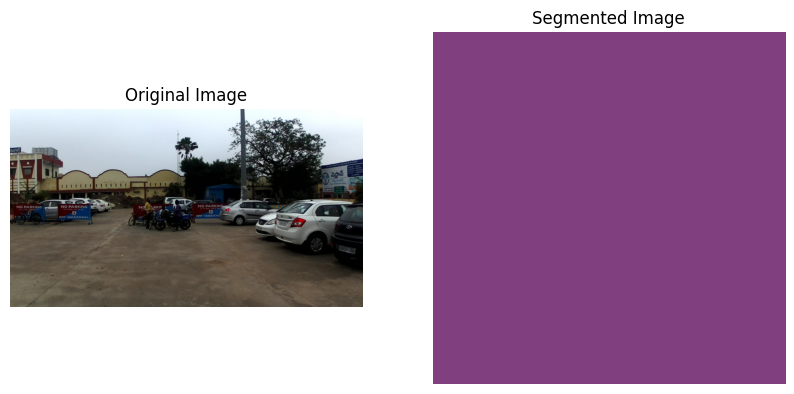

Inference time for a single image: 0.1820 seconds


In [12]:
import time
import matplotlib.pyplot as plt

def visualize_and_time_inference(model, image_path):
    # Set model to evaluation mode
    model.eval()

    # Load and preprocess the image
    image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor()
    ])
    input_image = transform(image).unsqueeze(0)  # Add batch dimension

    # Move image to the same device as model
    input_image = input_image.to(model.device)

    # Calculate inference time
    start_time = time.time()
    with torch.no_grad():
        output = model(input_image)
    end_time = time.time()
    inference_time = end_time - start_time

    # Process the output
    output = output.squeeze(0).cpu().numpy().transpose(1, 2, 0)  # Convert to HWC format
    segmented_image = np.argmax(output, axis=2)

    # Decode the segmented image to RGB for visualization
    def decode_segmap(seg_image):
        r = seg_image.copy()
        g = seg_image.copy()
        b = seg_image.copy()
        for l in range(0, n_classes):
            r[seg_image == l] = labels_list[l][11][0]
            g[seg_image == l] = labels_list[l][11][1]
            b[seg_image == l] = labels_list[l][11][2]
        rgb = np.stack([r, g, b], axis=2)
        return rgb

    decoded_image = decode_segmap(segmented_image)

    # Visualize the original and segmented images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Segmented Image')
    plt.imshow(decoded_image)
    plt.axis('off')

    plt.show()

    print(f"Inference time for a single image: {inference_time:.4f} seconds")

# Provide the path to a single input image
image_path = "D:/New folder/Inter_Bootcamp/dataset/test/frame0000_leftImg8bit.jpg"
visualize_and_time_inference(model, image_path)
